# Seoul Air Pollution Data Analysis


## Overview
This dataset contains hourly measurements of six key air pollutants <b>(SO2, NO2, CO, O3, PM10, PM2.5)</b> across 25 districts in Seoul, South Korea, spanning from 2017 to 2019. The data provides a comprehensive view of urban air quality variations across space and time in one of Asia's major metropolitan areas.


## Dataset Overview

### The dataset is organized into four distinct files:

<b>1. Measurement Information: </b> Contains the hourly readings of air pollutants after calibration <br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;Temporal resolution: </b> Hourly averages <br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;Spatial coverage: </b>25 districts in Seoul <br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;Time period: </b>2017-2019 <br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;Pollutants measured: </b>SO2, NO2, CO, O3, PM10, PM2.5<br><br>
<b>2. Measurement Item Information: </b>Details about the air pollution measurement parameters <br>   
<b>3. Measurement Station Information: </b>Metadata about the monitoring stations across Seoul's districts <br><br>
<b>4. Measurement Summary: </b>A condensed version of the dataset synthesizing information from the other three files <br> 

## Data Quality Indicators
### Instrument status is coded as follows:

<b>0:</b> Normal operation
<b>1:</b> Need for calibration
<b>2:</b> Abnormal readings
<b>4:</b> Power cut off
<b>8:</b> Under repair
<b>9:</b> Abnormal data

In [83]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Markdown, display

## Set visual styles
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.2)

## Table of Contents
1. [Data Loading](#data-loading)
2. [Preprocessing](#preprocessing)
3. [Exploratory Data Analysis](#eda)
4. [Conclusion](#conclusion)
5. [Recommendations](#recommendations)

<a id="data-loading"></a>


## Data Loading

In [5]:
# Load the datasets
measure_info = pd.read_csv(r"Seoul Air Pollution Data/measurement_info.csv")
measure_info.head()

,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0


In [6]:
measure_info.shape

(3885066, 5)

In [7]:
measure_items = pd.read_csv(r'Seoul Air Pollution Data/measurement_item_info.csv')
measure_items.head()

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0


In [8]:
measure_items.shape

(6, 7)

In [9]:
station_info = pd.read_csv(r'Seoul Air Pollution Data/measurement_station_info.csv')
station_info.head()

,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679


In [10]:
station_info.shape

(25, 5)

In [11]:
print(measure_info.columns)

Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status'],
      dtype='object')


In [12]:
# Display basic information
print("Dataset timespan:", measure_info['Measurement date'].min(), "to", measure_info['Measurement date'].max())
print("No of districts:", station_info['Station code'].nunique())
print("Number of measurements:", len(measure_info))

Dataset timespan: 2017-01-01 00:00 to 2019-12-31 23:00
No of districts: 25
Number of measurements: 3885066


In [13]:
print(measure_items.columns)

Index(['Item code', 'Item name', 'Unit of measurement', 'Good(Blue)',
       'Normal(Green)', 'Bad(Yellow)', 'Very bad(Red)'],
      dtype='object')


In [85]:
station_info.columns

Index(['Station code', 'Station name(district)', 'Address', 'Latitude',
       'Longitude'],
      dtype='object')

<a id="preprocessing"></a>

## Preprocessing

In [16]:
measure_info['Measurement date'] = pd.to_datetime(measure_info['Measurement date'])

# Add time components
measure_info['hour'] = measure_info['Measurement date'].dt.hour
measure_info['day'] = measure_info['Measurement date'].dt.day_name()
measure_info['month'] = measure_info['Measurement date'].dt.month_name()
measure_info['year'] = measure_info['Measurement date'].dt.year

measure_info.head()

,Measurement date,Station code,Item code,Average value,Instrument status,hour,day,month,year
0,2017-01-01,101,1,0.004,0,0,Sunday,January,2017
1,2017-01-01,101,3,0.059,0,0,Sunday,January,2017
2,2017-01-01,101,5,1.200,0,0,Sunday,January,2017
3,2017-01-01,101,6,0.002,0,0,Sunday,January,2017
4,2017-01-01,101,8,73.000,0,0,Sunday,January,2017


In [17]:
sub_item = measure_items[['Item code', 'Item name']]
sub_item

,Item code,Item name
0,1,SO2
1,3,NO2
2,5,CO
3,6,O3
4,8,PM10
5,9,PM2.5


In [18]:
sub_station = station_info[['Station code', 'Station name(district)']]
sub_station

,Station code,Station name(district)
0,101,Jongno-gu
1,102,Jung-gu
2,103,Yongsan-gu
3,104,Eunpyeong-gu
4,105,Seodaemun-gu
5,106,Mapo-gu
6,107,Seongdong-gu
7,108,Gwangjin-gu
8,109,Dongdaemun-gu
9,110,Jungnang-gu


In [19]:
measure_info = measure_info.merge(sub_station, on = ['Station code'], how = 'left')
measure_info.head()

,Measurement date,Station code,Item code,Average value,Instrument status,hour,day,month,year,Station name(district)
0,2017-01-01,101,1,0.004,0,0,Sunday,January,2017,Jongno-gu
1,2017-01-01,101,3,0.059,0,0,Sunday,January,2017,Jongno-gu
2,2017-01-01,101,5,1.200,0,0,Sunday,January,2017,Jongno-gu
3,2017-01-01,101,6,0.002,0,0,Sunday,January,2017,Jongno-gu
4,2017-01-01,101,8,73.000,0,0,Sunday,January,2017,Jongno-gu


In [20]:
measure_info.shape

(3885066, 10)

In [21]:
measure_info = measure_info.merge(sub_item, on = ['Item code'], how ='left')
measure_info.head()

,Measurement date,Station code,Item code,Average value,Instrument status,hour,day,month,year,Station name(district),Item name
0,2017-01-01,101,1,0.004,0,0,Sunday,January,2017,Jongno-gu,SO2
1,2017-01-01,101,3,0.059,0,0,Sunday,January,2017,Jongno-gu,NO2
2,2017-01-01,101,5,1.200,0,0,Sunday,January,2017,Jongno-gu,CO
3,2017-01-01,101,6,0.002,0,0,Sunday,January,2017,Jongno-gu,O3
4,2017-01-01,101,8,73.000,0,0,Sunday,January,2017,Jongno-gu,PM10


In [52]:
measure_info = measure_info.rename(columns = {'Item name':'Pollutants'})
measure_info.head()

,Average value,Month,Year,Station name(district),Pollutants,Status,Date,Hour
0,0.004,January,2017,Jongno-gu,SO2,Normal,1,0
1,0.059,January,2017,Jongno-gu,NO2,Normal,1,0
2,1.200,January,2017,Jongno-gu,CO,Normal,1,0
3,0.002,January,2017,Jongno-gu,O3,Normal,1,0
4,73.000,January,2017,Jongno-gu,PM10,Normal,1,0


In [24]:
measure_info = measure_info.drop(['Station code', 'Item code'], axis = 1)
measure_info.head()

,Measurement date,Average value,Instrument status,hour,day,month,year,Station name(district),Item name
0,2017-01-01,0.004,0,0,Sunday,January,2017,Jongno-gu,SO2
1,2017-01-01,0.059,0,0,Sunday,January,2017,Jongno-gu,NO2
2,2017-01-01,1.200,0,0,Sunday,January,2017,Jongno-gu,CO
3,2017-01-01,0.002,0,0,Sunday,January,2017,Jongno-gu,O3
4,2017-01-01,73.000,0,0,Sunday,January,2017,Jongno-gu,PM10


In [25]:
measure_info = measure_info.rename(columns = {'month':'Month', 'year':'Year'})

In [26]:
measure_info = measure_info.drop(columns = {'day', 'hour'})
measure_info.head()

,Measurement date,Average value,Instrument status,Month,Year,Station name(district),Item name
0,2017-01-01,0.004,0,January,2017,Jongno-gu,SO2
1,2017-01-01,0.059,0,January,2017,Jongno-gu,NO2
2,2017-01-01,1.200,0,January,2017,Jongno-gu,CO
3,2017-01-01,0.002,0,January,2017,Jongno-gu,O3
4,2017-01-01,73.000,0,January,2017,Jongno-gu,PM10


<a id="eda"></a>

## Exploratory Data Analysis

In [27]:
measure_info.isnull().sum()

Measurement date          0
Average value             0
Instrument status         0
Month                     0
Year                      0
Station name(district)    0
Item name                 0
dtype: int64

In [28]:
measure_info.dtypes

Measurement date          datetime64[ns]
Average value                    float64
Instrument status                  int64
Month                             object
Year                               int64
Station name(district)            object
Item name                         object
dtype: object

In [30]:
measure_info['Measurement date'] = measure_info['Measurement date'].astype(str)

In [31]:
measure_info.dtypes

Measurement date           object
Average value             float64
Instrument status           int64
Month                      object
Year                        int64
Station name(district)     object
Item name                  object
dtype: object

In [32]:
measure_info['Instrument status'].value_counts()

0    3775778
8      32341
1      29717
4      22752
9      20490
2       3988
Name: Instrument status, dtype: int64

## Instrument status Information

0 = Normal

1 = Need Calibration

2 = Abnormal

4 = Power Cut-off

8 = Under Repair

9 = Abnormal Data

In [33]:
Status = {'Instrument status': [0,1,2,4,8,9], 'Status':['Normal','Need Calibration','Abnormal','Power Cut-off','Under Repair',' Abnormal Data']}
Status = pd.DataFrame(Status)
Status

,Instrument status,Status
0,0,Normal
1,1,Need Calibration
2,2,Abnormal
3,4,Power Cut-off
4,8,Under Repair
5,9,Abnormal Data


In [34]:
measure_info = measure_info.merge(Status, on = ["Instrument status"])
measure_info.head()

,Measurement date,Average value,Instrument status,Month,Year,Station name(district),Item name,Status
0,2017-01-01 00:00:00,0.004,0,January,2017,Jongno-gu,SO2,Normal
1,2017-01-01 00:00:00,0.059,0,January,2017,Jongno-gu,NO2,Normal
2,2017-01-01 00:00:00,1.200,0,January,2017,Jongno-gu,CO,Normal
3,2017-01-01 00:00:00,0.002,0,January,2017,Jongno-gu,O3,Normal
4,2017-01-01 00:00:00,73.000,0,January,2017,Jongno-gu,PM10,Normal


In [35]:
measure_info = measure_info.drop(['Instrument status'], axis = 1)
measure_info.head()

,Measurement date,Average value,Month,Year,Station name(district),Item name,Status
0,2017-01-01 00:00:00,0.004,January,2017,Jongno-gu,SO2,Normal
1,2017-01-01 00:00:00,0.059,January,2017,Jongno-gu,NO2,Normal
2,2017-01-01 00:00:00,1.200,January,2017,Jongno-gu,CO,Normal
3,2017-01-01 00:00:00,0.002,January,2017,Jongno-gu,O3,Normal
4,2017-01-01 00:00:00,73.000,January,2017,Jongno-gu,PM10,Normal


In [36]:
measure_info['Date'] = pd.DatetimeIndex(measure_info['Measurement date']).day
measure_info['Hour'] = pd.DatetimeIndex(measure_info['Measurement date']).hour
measure_info.head()

,Measurement date,Average value,Month,Year,Station name(district),Item name,Status,Date,Hour
0,2017-01-01 00:00:00,0.004,January,2017,Jongno-gu,SO2,Normal,1,0
1,2017-01-01 00:00:00,0.059,January,2017,Jongno-gu,NO2,Normal,1,0
2,2017-01-01 00:00:00,1.200,January,2017,Jongno-gu,CO,Normal,1,0
3,2017-01-01 00:00:00,0.002,January,2017,Jongno-gu,O3,Normal,1,0
4,2017-01-01 00:00:00,73.000,January,2017,Jongno-gu,PM10,Normal,1,0


In [37]:
measure_info.tail()

,Measurement date,Average value,Month,Year,Station name(district),Item name,Status,Date,Hour
3885061,2019-12-31 06:00:00,34.0,December,2019,Yongsan-gu,PM10,Abnormal,31,6
3885062,2019-12-31 07:00:00,28.0,December,2019,Yongsan-gu,PM10,Abnormal,31,7
3885063,2019-12-31 08:00:00,49.0,December,2019,Yongsan-gu,PM10,Abnormal,31,8
3885064,2019-12-31 09:00:00,50.0,December,2019,Yongsan-gu,PM10,Abnormal,31,9
3885065,2019-12-31 10:00:00,85.0,December,2019,Yongsan-gu,PM10,Abnormal,31,10


In [38]:
measure_info = measure_info.drop(["Measurement date"], axis = 1)
measure_info.head()

,Average value,Month,Year,Station name(district),Item name,Status,Date,Hour
0,0.004,January,2017,Jongno-gu,SO2,Normal,1,0
1,0.059,January,2017,Jongno-gu,NO2,Normal,1,0
2,1.200,January,2017,Jongno-gu,CO,Normal,1,0
3,0.002,January,2017,Jongno-gu,O3,Normal,1,0
4,73.000,January,2017,Jongno-gu,PM10,Normal,1,0


In [39]:
measure_info.shape


(3885066, 8)

In [40]:
measure_info.describe()

,Average value,Year,Date,Hour
count,3.885066e+06,3.885066e+06,3.885066e+06,3.885066e+06
mean,1.161132e+01,2.017985e+03,1.577164e+01,1.150238e+01
std,3.816098e+01,8.133678e-01,8.829713e+00,6.919020e+00
min,-1.000000e+00,2.017000e+03,1.000000e+00,0.000000e+00
25%,1.200000e-02,2.017000e+03,8.000000e+00,6.000000e+00
50%,7.000000e-02,2.018000e+03,1.600000e+01,1.200000e+01
75%,1.500000e+01,2.019000e+03,2.300000e+01,1.700000e+01
max,6.256000e+03,2.019000e+03,3.100000e+01,2.300000e+01


In [41]:
measure_info.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Average value,3885066.0,NaN,NaN,NaN,11.611324,38.160981,-1.0,0.012,0.07,15.0,6256.0
Month,3885066,12,October,334800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,3885066.0,NaN,NaN,NaN,2017.985345,0.813368,2017.0,2017.0,2018.0,2019.0,2019.0
Station name(district),3885066,25,Gangseo-gu,155436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item name,3885066,6,SO2,647511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,3885066,6,Normal,3775778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,3885066.0,NaN,NaN,NaN,15.771636,8.829713,1.0,8.0,16.0,23.0,31.0
Hour,3885066.0,NaN,NaN,NaN,11.502379,6.91902,0.0,6.0,12.0,17.0,23.0


In [42]:
measure_info.groupby(['Month'])['Average value'].mean()

Month
April        12.763357
August        7.266394
December     13.120275
February     14.301027
January      15.891403
July          8.571138
June         10.482915
March        17.155903
May          13.519258
November     12.185343
October       7.550285
September     7.081498
Name: Average value, dtype: float64

In [43]:
measure_info.groupby(['Year'])['Average value'].mean()

Year
2017    11.586200
2018    11.072096
2019    12.201237
Name: Average value, dtype: float64

In [44]:
measure_info.groupby(['Station name(district)'])['Average value'].mean()

Station name(district)
Dobong-gu          11.607329
Dongdaemun-gu      10.241732
Dongjak-gu         11.091573
Eunpyeong-gu       11.292960
Gangbuk-gu         10.178419
Gangdong-gu        11.800125
Gangnam-gu         10.705099
Gangseo-gu         13.080428
Geumcheon-gu       10.899941
Guro-gu            13.797258
Gwanak-gu          12.185327
Gwangjin-gu        12.622543
Jongno-gu          10.242859
Jung-gu            10.233584
Jungnang-gu        10.069908
Mapo-gu            12.853491
Nowon-gu           10.874978
Seocho-gu          14.027262
Seodaemun-gu       10.805200
Seongbuk-gu        12.064813
Seongdong-gu       12.648037
Songpa-gu          11.749635
Yangcheon-gu       11.498710
Yeongdeungpo-gu    13.767154
Yongsan-gu          9.946050
Name: Average value, dtype: float64

In [45]:
measure_info.groupby(['Status'])['Average value'].mean()

Status
 Abnormal Data       95.804843
Abnormal            215.103032
Need Calibration     16.045280
Normal               11.007934
Power Cut-off        -0.647822
Under Repair          8.172178
Name: Average value, dtype: float64

In [46]:
measure_info.groupby(['Year','Month'])['Average value'].mean()

Year  Month    
2017  April        13.785433
      August        5.769704
      December     14.811703
      February     12.489017
      January      14.337679
      July          9.339461
      June         10.687240
      March        16.619704
      May          14.591266
      November     10.714108
      October       7.367980
      September     8.523488
2018  April        13.291203
      August        6.994282
      December     12.148338
      February     13.753487
      January      14.942190
      July          7.856529
      June         11.320648
      March        14.093738
      May          11.618625
      November     13.760277
      October       7.579595
      September     5.760708
2019  April        11.211278
      August        9.054132
      December     12.388990
      February     16.660576
      January      18.397707
      July          8.515863
      June          9.440856
      March        22.281463
      May          14.403760
      November     12.08164

In [47]:
pd.set_option('display.max_rows', None)
grouped_data = measure_info.groupby(['Station name(district)','Year','Month'])['Average value'].mean()
grouped_data.head()

Station name(district)  Year  Month   
Dobong-gu               2017  April       13.405665
                              August       5.685269
                              December    13.826626
                              February    12.117790
                              January     14.163661
Name: Average value, dtype: float64

In [48]:
grouped_data.tail()

Station name(district)  Year  Month    
Yongsan-gu              2019  March        19.618901
                              May          11.254679
                              November      8.387718
                              October       6.292856
                              September     4.599181
Name: Average value, dtype: float64

In [49]:
measure_info.pivot_table(index = 'Status', columns = ['Station name(district)','Year'], values =['Average value'], aggfunc = ['mean','sum']).T

Status                                           Abnormal Data       Abnormal  \
                   Station name(district) Year                                  
mean Average value Dobong-gu              2017       33.016874      48.590909   
                                          2018       22.594080       0.000000   
                                          2019      568.946159            NaN   
                   Dongdaemun-gu          2017       37.741935            NaN   
                                          2018       12.437877       0.004000   
                                          2019       27.287980       0.920727   
                   Dongjak-gu             2017       63.462469      48.357143   
                                          2018       32.073552      -0.825222   
                                          2019       37.463228      58.333333   
                   Eunpyeong-gu           2017       20.649643      -1.000000   
                                          2018       29.065445     985.000000   
                                          2019       31.345793     135.523077   
                   Gangbuk-gu             2017        5.882641            NaN   
                                          2018       19.699577            NaN   
                                          2019       35.526079            NaN   
                   Gangdong-gu            2017       41.828778       0.004000   
                                          2018       33.474940       3.670000   
                                          2019       30.863651      23.614370   
                   Gangnam-gu             2017       28.559846       8.618658   
                                          2018       32.408574      60.666667   
                                          2019       39.159623      22.492236   
                   Gangseo-gu             2017       30.009618      35.136364   
                                          2018     1276.033138            NaN   
                                          2019       33.033797       0.356000   
                   Geumcheon-gu           2017       15.610723            NaN   
                                          2018       41.789786       0.000000   
                                          2019       41.785582            NaN   
                   Guro-gu                2017       36.908083      -1.000000   
                                          2018      323.860317      30.348315   
                                          2019      363.365020     686.071429   
                   Gwanak-gu              2017       44.653805       0.990615   
                                          2018      176.978533       0.052850   
                                          2019       39.525312     851.444136   
                   Gwangjin-gu            2017        3.793985      12.238095   
                                          2018       63.569006       0.407000   
                                          2019      155.738854     985.000000   
                   Jongno-gu              2017       30.366409            NaN   
                                          2018       45.937327      37.433333   
                                          2019       34.352941      14.246429   
                   Jung-gu                2017       30.370647            NaN   
                                          2018       43.712846      -0.257000   
                                          2019       44.305130            NaN   
                   Jungnang-gu            2017       24.710845            NaN   
                                          2018       12.111542       0.069069   
                                          2019       24.153489      17.454545   
                   Mapo-gu                2017       13.507082            NaN   
                                          2018      277.364171      71.243902   
                               

In [53]:
df = measure_info.pivot_table(index='Status', columns= ['Pollutants'], values='Average value', aggfunc='median')
df

Pollutants,CO,NO2,O3,PM10,PM2.5,SO2
Status,,,,,,
Abnormal Data,0.9,0.004,0.021,29.0,27.0,0.003
Abnormal,0.1,0.000,0.001,985.0,21.0,0.001
Need Calibration,0.3,0.012,0.013,9.0,4.0,0.003
Normal,0.5,0.025,0.021,35.0,19.0,0.004
Power Cut-off,-1.0,-1.000,-1.000,-1.0,-1.0,-1.000
Under Repair,0.1,0.000,0.000,0.0,0.0,0.000


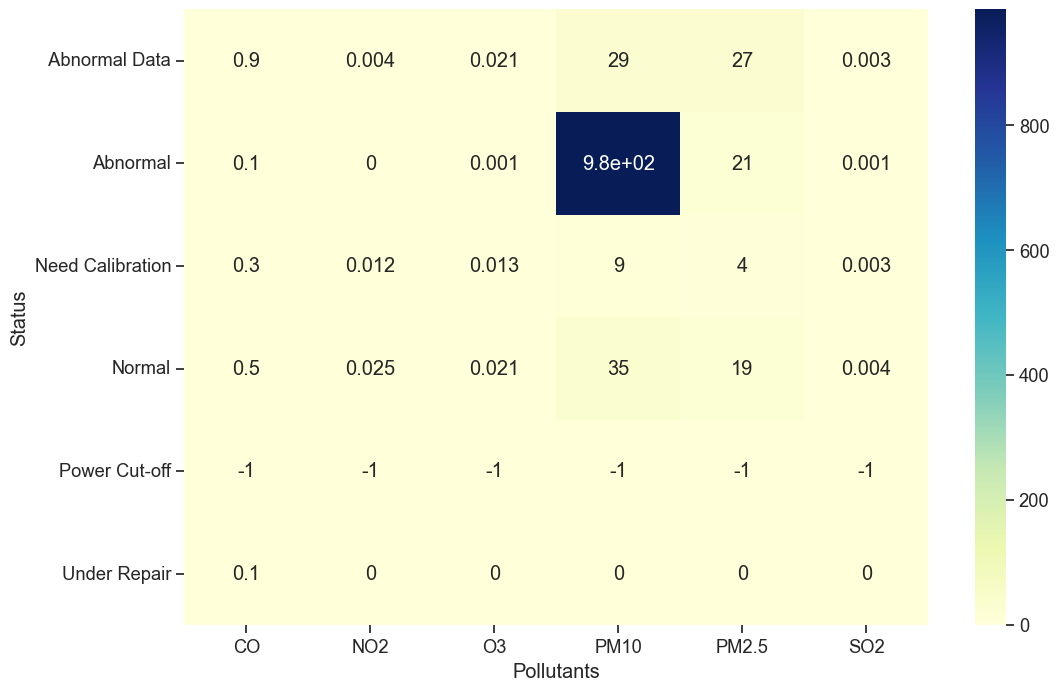

In [80]:
plt.figure(figsize = (12, 8))
sns.heatmap(df,annot = True, cmap = 'YlGnBu')
plt.show()

In [55]:
df1 = measure_info.pivot_table(index = 'Status', columns = ["Pollutants"], values = ['Average value'], aggfunc = 'sum')
df1

Average value                                                \
Pollutants                  CO        NO2         O3        PM10       PM2.5   
Status                                                                         
 Abnormal Data          1968.2    -42.614    -50.012   1162579.0    798593.0   
Abnormal                  -8.1     -2.335   -139.998    548470.0    309563.0   
Need Calibration        3900.8     -6.715     31.678    256713.0    216204.0   
Normal                325252.6  18117.905  15376.246  26099427.0  15102615.0   
Power Cut-off          -3049.0  -3193.124  -3212.915      -307.0     -1775.0   
Under Repair            1646.2   -292.139   -363.472    234562.0     29346.0   

                            
Pollutants             SO2  
Status                      
 Abnormal Data      -6.340  
Abnormal           -51.675  
Need Calibration   -25.166  
Normal            2725.379  
Power Cut-off    -3202.215  
Under Repair      -602.185

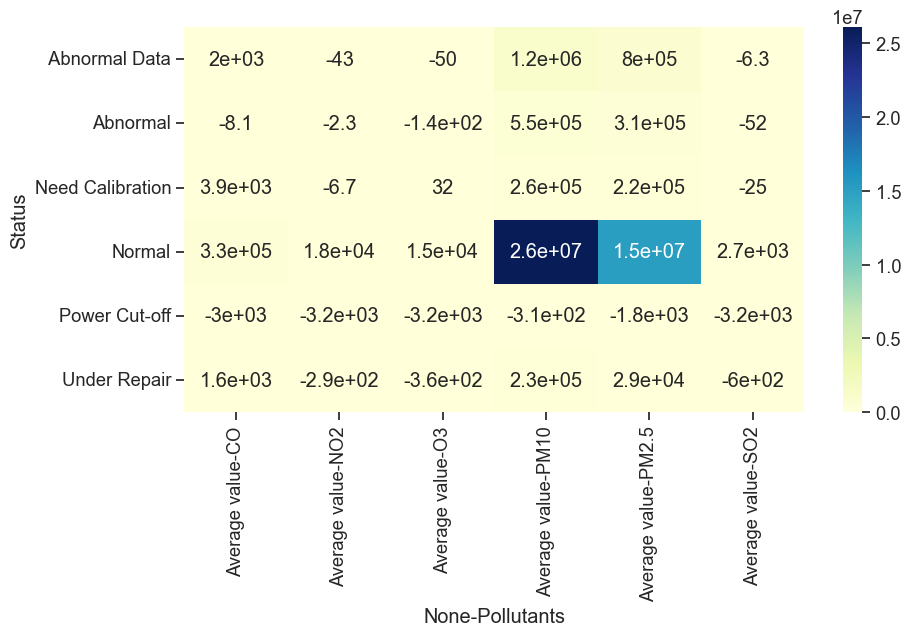

In [87]:
plt.figure(figsize = (10, 5))
sns.heatmap(df1, annot = True, cmap = 'YlGnBu')
plt.show()

In [57]:
df2 = measure_info.pivot_table(index = 'Status', columns = ["Pollutants"], values = ['Average value'], aggfunc = 'mean')
df2

Average value                                              \
Pollutants                  CO       NO2        O3        PM10       PM2.5   
Status                                                                       
 Abnormal Data        0.850930 -0.186087 -0.048461  130.392441  126.219851   
Abnormal             -0.012960 -0.003772 -0.217051  654.498807  410.017219   
Need Calibration      0.743293 -0.001310  0.006238   56.657029   47.371604   
Normal                0.516451  0.028642  0.024363   41.798675   24.081037   
Power Cut-off        -0.776024 -0.849009 -0.832577   -0.082772   -0.474726   
Under Repair          0.293336 -0.056040 -0.062917   45.911529    5.907005   

                            
Pollutants             SO2  
Status                      
 Abnormal Data   -0.003790  
Abnormal         -0.102125  
Need Calibration -0.004867  
Normal            0.004321  
Power Cut-off    -0.852787  
Under Repair     -0.106356

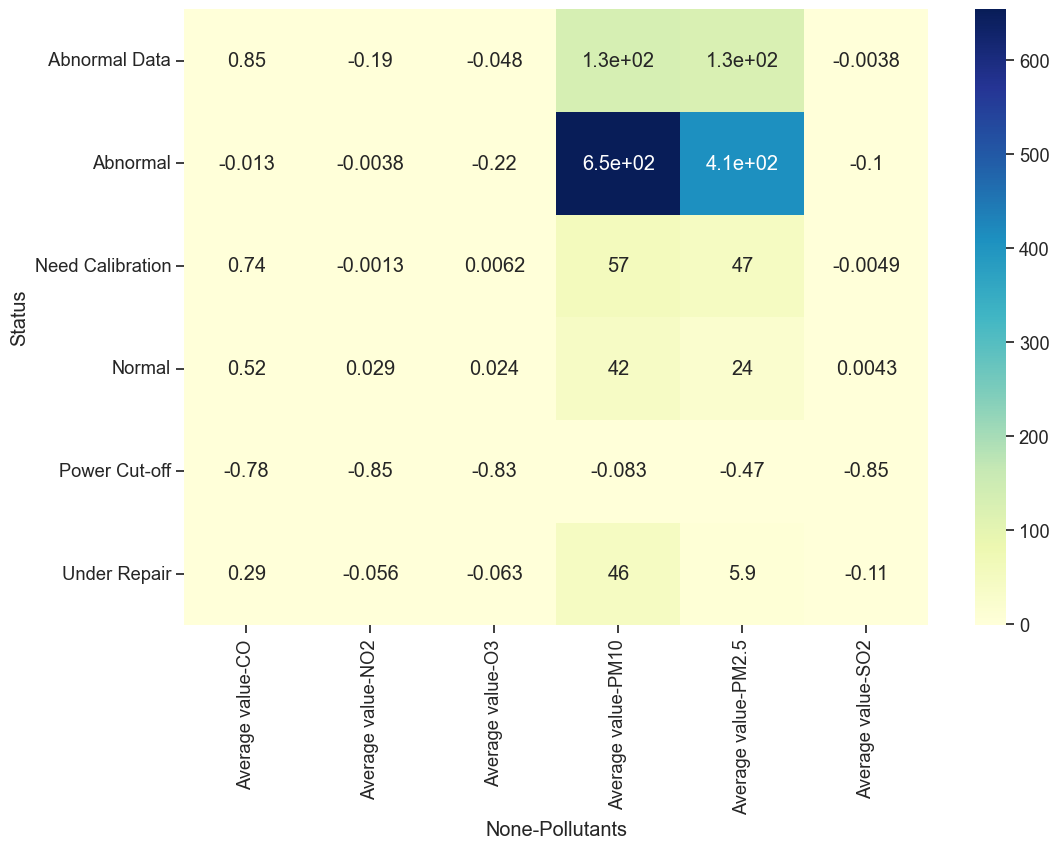

In [81]:
plt.figure(figsize = (12, 8))
sns.heatmap(df2,annot = True, cmap = 'YlGnBu')
plt.show()

In [63]:
print(measure_info.columns)

Index(['Average value', 'Month', 'Year', 'Station name(district)',
       'Pollutants', 'Status', 'Date', 'Hour'],
      dtype='object')


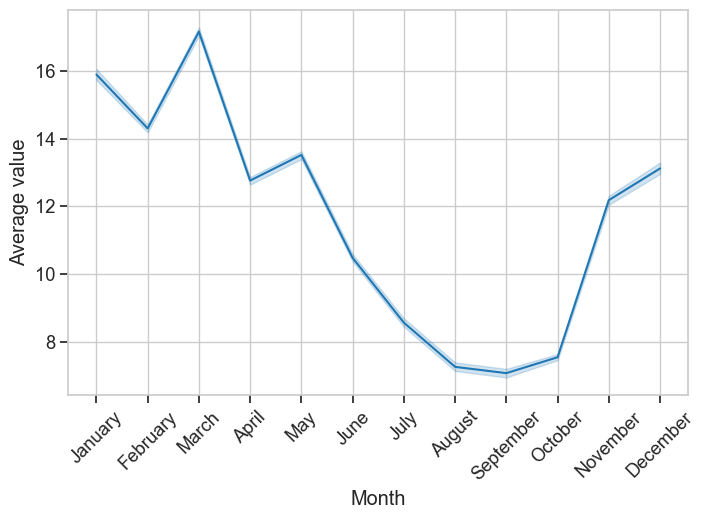

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,5))
sns.lineplot(data = measure_info, x = 'Month', y = 'Average value')
plt.xticks(rotation=45)
plt.show()

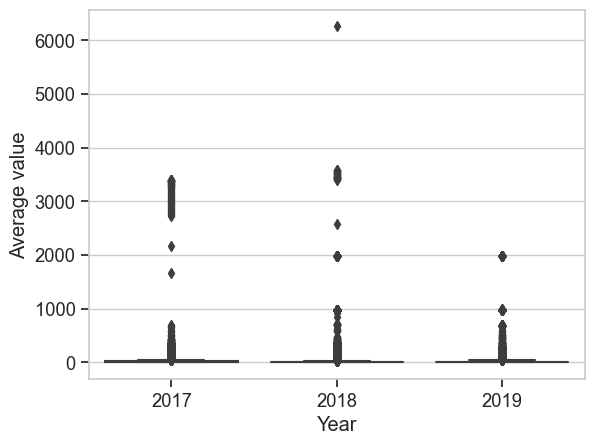

In [73]:
sns.boxplot(data=measure_info , x = 'Year', y = 'Average value' )
plt.show()

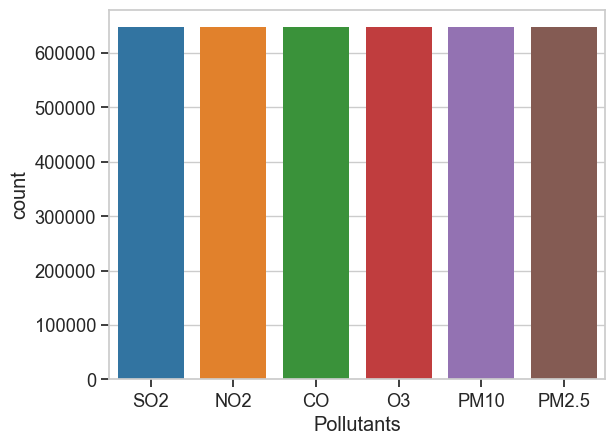

In [78]:
sns.countplot(data = measure_info, x = 'Pollutants')
plt.show()

<a id="conclusion"></a>

## Conclusion

1> Higher pollution levels occur during winter months (December, January, February, March) with a peak in March.

2> A gradual decline in pollution occurs from April through June.

3> The lowest pollution levels are observed during summer and early autumn (July, August, September).

4> Pollution begins increasing again in October through December.

<a id="recommendations"></a>

## Recommendations

1> Seasonal patterns indicate that pollution management strategies should be adapted throughout the year.

2> Future analysis should consider instrument status when drawing conclusions about pollution levels.

In [1]:
import os 
os.getcwd()

'C:\\Users\\User\\Seoul-Air-Pollution-Data-Analysis'